In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif


Automatically created module for IPython interactive environment


In [2]:
iris = datasets.load_iris()
print iris.data.shape

(150, 4)


In [4]:
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

X = np.hstack((iris.data, E))
y = iris.target
plt.figure(1)
plt.clf()
X_indices = np.arange(X.shape[-1])
print X.shape[-1]

24


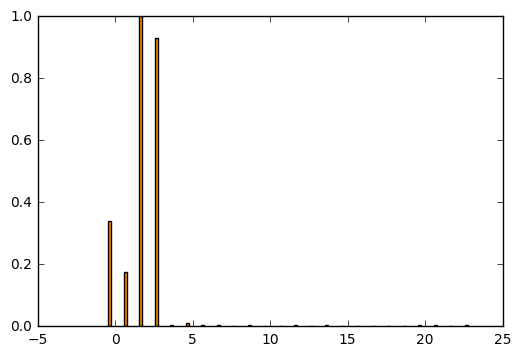

In [5]:
# Univariate feature selection using F-test for feature scoring
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')
plt.show()

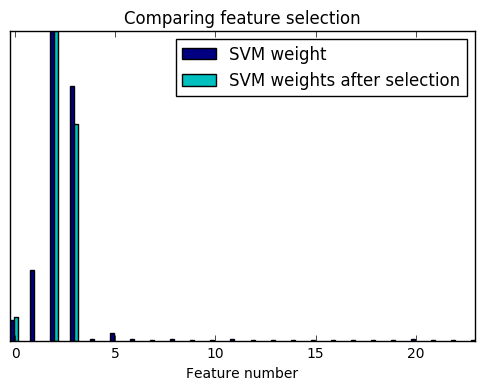

In [7]:
# Comparing to the weights of SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
       color='navy')
clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - 0.05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c')

plt.title('Comparing feature selection')
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()


